Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test_0002_aligned.jpg  test_0694_aligned.jpg  test_1285_aligned.jpg  test_1934_aligned.jpg
test_0004_aligned.jpg  test_0695_aligned.jpg  test_1317_aligned.jpg  test_1938_aligned.jpg
test_0008_aligned.jpg  test_0706_aligned.jpg  test_1320_aligned.jpg  test_1945_aligned.jpg
test_0015_aligned.jpg  test_0722_aligned.jpg  test_1328_aligned.jpg  test_1962_aligned.jpg
test_0023_aligned.jpg  test_0731_aligned.jpg  test_1331_aligned.jpg  test_1966_aligned.jpg
test_0034_aligned.jpg  test_0754_aligned.jpg  test_1332_aligned.jpg  test_1967_aligned.jpg
test_0035_aligned.jpg  test_0761_aligned.jpg  test_1333_aligned.jpg  test_1969_aligned.jpg
test_0043_aligned.jpg  test_0762_aligned.jpg  test_1334_aligned.jpg  test_1970_aligned.jpg
test_0059_aligned.jpg  test_0764_aligned.jpg  test_1338_aligned.jpg  test_1971_aligned.jpg
test_0073_aligned.jpg  test_0766_aligned.jpg  test_1

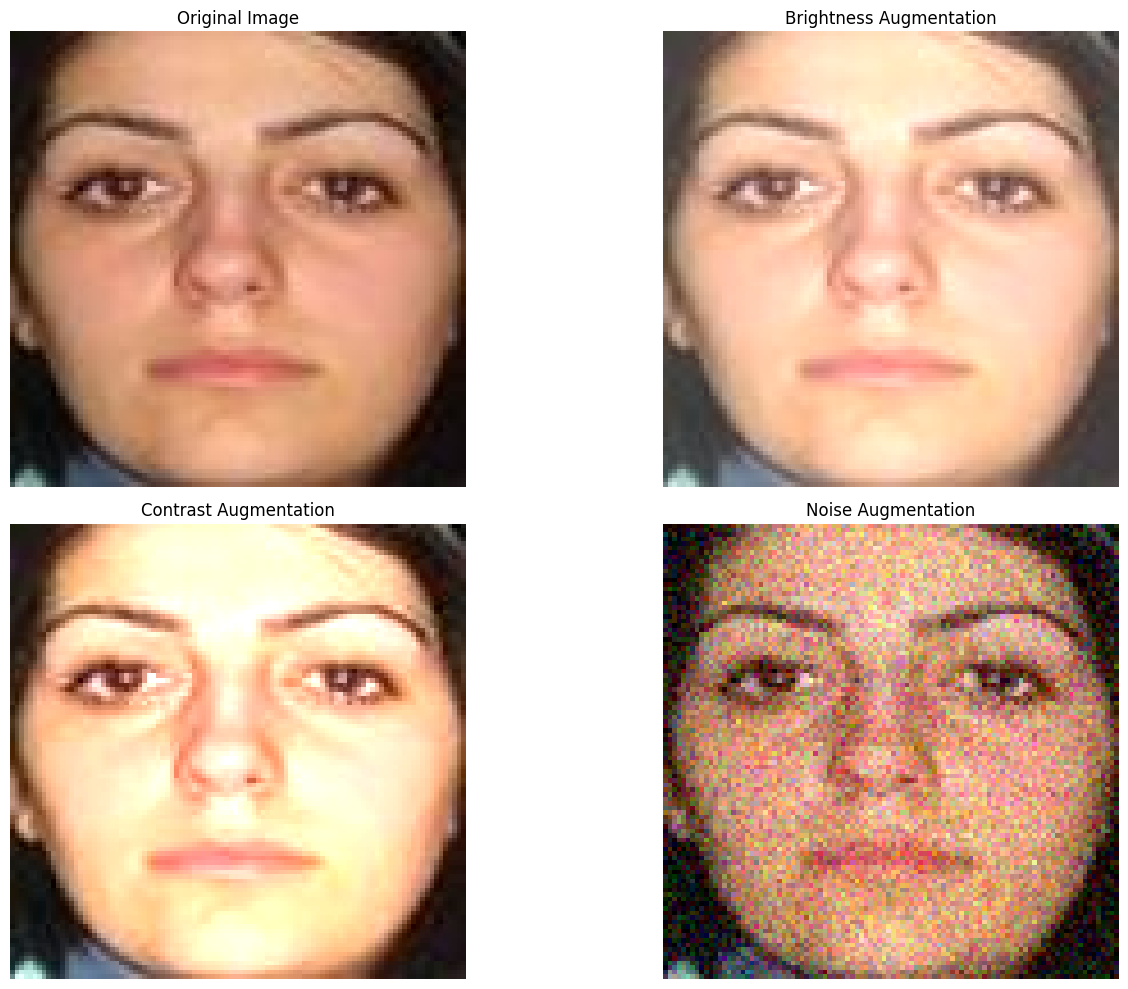

In [ ]:
#brightness, contrast, noise augmentation techniques

import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/datasetRAFtest/"

img_path = '/content/drive/My Drive/datasetRAFtest/test_2567_aligned.jpg'
img = cv2.imread(img_path)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def adjust_brightness(image, beta=50):
  return cv2.convertScaleAbs(image, alpha=1, beta=beta)

def adjust_contrast(image, alpha=1.5):
  return cv2.convertScaleAbs(image, alpha=alpha, beta=0)

def add_noise(image, mean=0, sigma=25):
  guass = np.random.normal(mean, sigma, image.shape)
  noisy_image = image.astype(np.float32) + guass
  noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
  return noisy_image

bright_img = adjust_brightness(img, beta=50)
contrast_img = adjust_contrast(img, alpha=1.5)
noise_img = add_noise(img, mean=0, sigma=25)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(bright_img)
plt.title("Brightness Augmentation")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(contrast_img)
plt.title("Contrast Augmentation")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(noise_img)
plt.title("Noise Augmentation")
plt.axis("off")

plt.tight_layout()
plt.show()


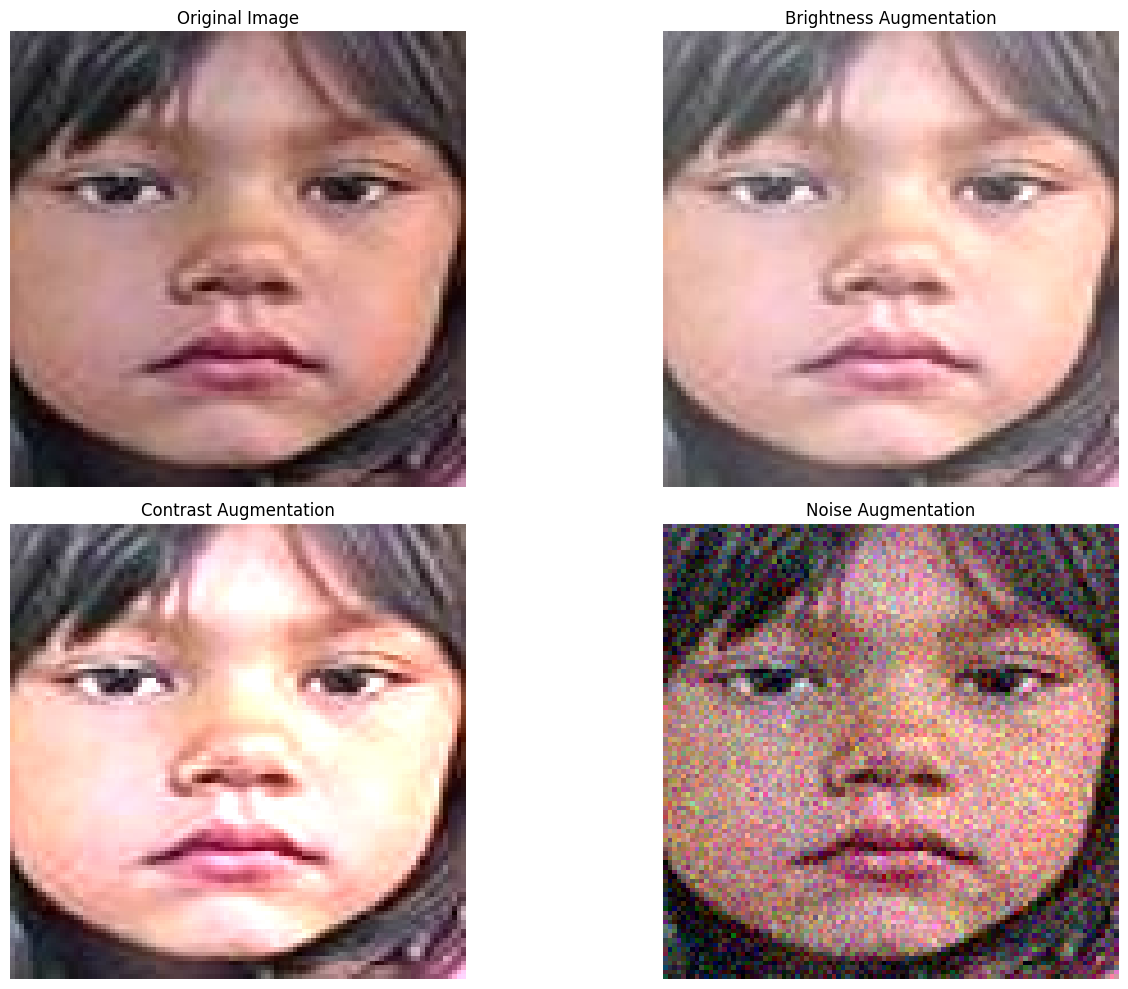

In [ ]:
img_path = '/content/drive/My Drive/datasetRAF/test_3022_aligned.jpg'
img = cv2.imread(img_path)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def adjust_brightness(image, beta=50):
  return cv2.convertScaleAbs(image, alpha=1, beta=beta)

def adjust_contrast(image, alpha=1.5):
  return cv2.convertScaleAbs(image, alpha=alpha, beta=0)

def add_noise(image, mean=0, sigma=25):
  guass = np.random.normal(mean, sigma, image.shape)
  noisy_image = image.astype(np.float32) + guass
  noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
  return noisy_image

bright_img = adjust_brightness(img, beta=50)
contrast_img = adjust_contrast(img, alpha=1.5)
noise_img = add_noise(img, mean=0, sigma=25)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(bright_img)
plt.title("Brightness Augmentation")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(contrast_img)
plt.title("Contrast Augmentation")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(noise_img)
plt.title("Noise Augmentation")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 47.2 MB/s eta 0:00:00


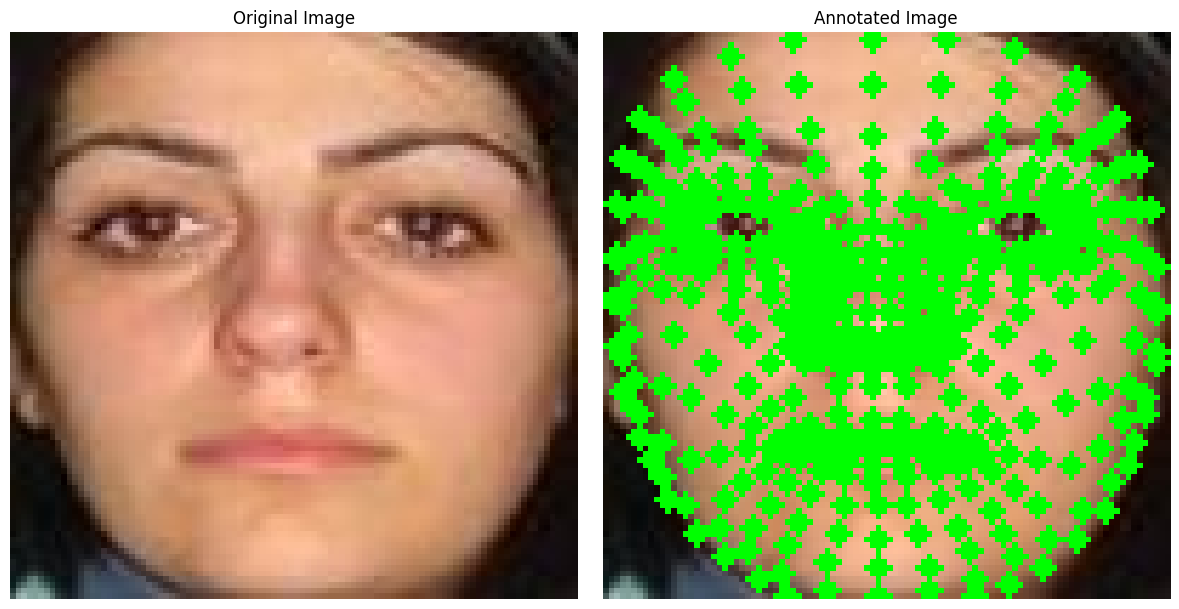

In [ ]:
#Landmark-Aware Method - Basic landmark detection function
import mediapipe as mp

mp_face_mesh = mp.solutions.face_mesh

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

def detect_facial_landmarks(image):
  img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  results = face_mesh.process(img)

  annotated_image = image.copy()
  if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        h, w, _ = image.shape
        for landmark in face_landmarks.landmark:
          x, y = int(landmark.x * w), int(landmark.y * h)
          cv2.circle(annotated_image, (x, y), 2, (0, 255, 0), -1)
  return annotated_image

annotated_img = detect_facial_landmarks(img)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(annotated_img)
plt.title("Annotated Image")
plt.axis("off")

plt.tight_layout()
plt.show()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/datasetRAFtest/


/content/drive/MyDrive/datasetRAFtest


In [15]:
!git clone https://github.com/RiyanMak/AIM25.git
%cd AIM25

Cloning into 'AIM25'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 43 (delta 14), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 398.14 KiB | 11.06 MiB/s, done.
Resolving deltas: 100% (14/14), done.
/content/drive/MyDrive/datasetRAFtest/AIM25


In [16]:
!ls

LICENSE  README.md


In [17]:
!git checkout Data-aug-techniques

Branch 'Data-aug-techniques' set up to track remote branch 'Data-aug-techniques' from 'origin'.
Switched to a new branch 'Data-aug-techniques'


In [18]:
!git branch

* Data-aug-techniques
  main


In [ ]:
!git